In [1]:
#############
# LIBRARIES #
#############

from get_strava_data import my_data, process_data # Functions to retrive data using strava api and process for visualizations

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
##########################
# Getting all activities #
##########################

my_data_df = my_data()
processed_data = process_data(my_data_df)

# Saving data to csv
processed_data.to_csv('./data/processed_data.csv', index=False)

Getting data...
Requesting page 1...
<Response [200]>
Requesting page 2...
<Response [200]>
Requesting page 3...
<Response [200]>
Requesting page 4...
<Response [200]>
Data retrieved successfully!


In [3]:
# Reading data from csv
processed_data = pd.read_csv('./data/processed_data.csv')
processed_data.head()

,distance,moving_time,elapsed_time,total_elevation_gain,type,id,achievement_count,kudos_count,comment_count,photo_count,...,max_heartrate,elev_high,pr_count,total_photo_count,suffer_score,year,month,day,weekday,hour
0,18.3,1.1,1.2,128.0,Ride,6947233958,6,7,0,0,...,167.0,48.6,3,0,126.0,2022,April,7,Thursday,15
1,0.0,0.6,0.6,0.0,Workout,6942582364,0,5,0,0,...,164.0,NaN,0,0,59.0,2022,April,6,Wednesday,18
2,19.3,1.2,1.3,265.7,Ride,6937664224,14,15,0,0,...,178.0,49.2,8,0,128.0,2022,April,5,Tuesday,15
3,0.0,0.5,0.5,0.0,Workout,6932749848,0,3,0,0,...,164.0,NaN,0,0,34.0,2022,April,4,Monday,19
4,5.0,0.4,0.8,24.9,Ride,6933025280,0,5,0,0,...,145.0,23.6,0,0,10.0,2022,April,4,Monday,18


In [ ]:
###########################
# STRAVA LIFETIME SUMMARY #
###########################

# Total number of activities
start_date = processed_data.year.min()
burger_calories = 354
total_activities = processed_data.id.count()
num_rides = (processed_data.type == 'Ride').sum()
num_runs = (processed_data.type == 'Workout').sum()
distance_traveled = processed_data.distance.sum().astype(int)
earth_circumference = 24901 # earth circumference in miles 
perc_around_the_earth = (distance_traveled / earth_circumference)
total_kudos = processed_data.kudos_count.sum()


print(f'Strava user since: {start_date}')
print(f'Total number of activities: {total_activities}')
print(f'Total distance traveled: {"{:,}".format(distance_traveled)} miles or {"{:.0%}".format(perc_around_the_earth)} of the earth circumference')

print(f'Number of Rides: {num_rides}')
print(f'Number of Runs: {num_runs}')


# Ratio of activities by type
processed_data['type'].value_counts(normalize=True)

# Breakdown of activities by type
processed_data['type'].value_counts()

# Total distance by activity type
total_by_activity = processed_data.groupby('type')['distance'].sum().sort_values(ascending=False)

In [15]:
# Activity Breakdown by type
# Chart of all activities by type
breakdown_by_type = processed_data['type'].value_counts()

fig = px.bar(breakdown_by_type, x=breakdown_by_type.index, y=breakdown_by_type.values, text_auto='.0s') # Plotly Express
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(
    # title_text="Activity Breakdown",
    yaxis_title="",
    xaxis_title="",
    font=dict(
        family="Arial",
        size=14,
    )
)
fig.update_traces(marker_color='#FC4C02',
                  marker_line_width=1.5, opacity=0.6)
                  
fig.update_yaxes(showticklabels=False)
fig.show()

<BarContainer object of 11 artists>

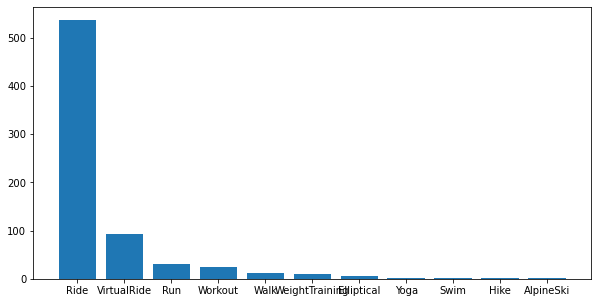

In [11]:
# Bar graph of breakdown by type
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.bar(breakdown_by_type.index, breakdown_by_type.values)

In [ ]:
# Grouping data by year, month and weekday
activities_df['cumulative_distance'] = activities_df.groupby(['year', 'month', 'weekday']).agg({'distance': 'cumsum'})
activities_df


In [ ]:
kjoule_to_cal = 0.239006 # 1 kjoule = 0.239006 calories
# Converting kjoule to calories
activities_df['calories'] = activities_df['kilojoules'] * kjoule_to_cal

In [ ]:
activities_df

In [ ]:
#################
# DATA ANALYSIS #
#################

# Total number of activities
start_date = activities_df.year.min()
burger_calories = 354
total_activities = activities_df.id.count()
total_calories = activities_df.calories.sum()
burgers_burned = total_calories / burger_calories



print(f'Total number of activities since {start_date}: {total_activities}')
print(f'Total calories burned: {total_activities} or {burgers_burned} burgers!')

# Ratio of activities by type
activities_df['type'].value_counts(normalize=True)

# Breakdown of activities by type
activities_df['type'].value_counts()

# Total distance by activity type
total_by_activity = activities_df.groupby('type')['distance'].sum().sort_values(ascending=False)

In [ ]:
activities_df.head()

In [ ]:
activities_df.columns

In [ ]:
total_by_activity

In [ ]:



# x=activities_df.groupby(['type'])['type'].count()
# y=len(activities_df)
# r=((x/y)).round(2)

# mf_ratio = pd.DataFrame(r).T
# mf_ratio

In [ ]:

fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Ride'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['Run'], left=mf_ratio['Ride'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Ride'][i]*100)}%", 
                   xy=(mf_ratio['Ride'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Ride", 
                   xy=(mf_ratio['Ride'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Run'][i]*100)}%", 
                   xy=(mf_ratio['Ride'][i]+mf_ratio['Run'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Run", 
                   xy=(mf_ratio['Ride'][i]+mf_ratio['Run'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Ride & Run distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than Runs on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

In [ ]:
# Grouping by activity type
grouped_by_type = activies_df.groupby(['Activity Type', 'Year', 'Month']).agg({'Activity ID': 'count', 'Distance':'sum', 'Elapsed Time':'sum', 'Calories':'sum'}).reset_index()
rides = grouped_by_type[grouped_by_type['Activity Type'] == 'Ride']
rides.head()

In [ ]:
# Calculating cummulative sum of distance and elapsed time
rides['Cummulative Distance'] = rides.groupby(['Year']).agg({'Distance': 'cumsum'})
rides['Cummulative Calories'] = rides.groupby(['Year']).agg({'Calories': 'cumsum'})
rides.tail()

In [ ]:
fig = px.line(rides, x="Month", y="Cummulative Distance", color='Year', markers=True)
fig.show()

In [ ]:
grouped_by_bike = activies_df.groupby('Activity Gear').agg({'Distance':'sum'}).sort_values(by='Distance', ascending=False).reset_index()
grouped_by_bike

In [ ]:
fig = px.bar(grouped_by_bike, x='Activity Gear', y='Distance', color='Activity Gear')
fig

In [ ]:
###########################
# UNSUPERVISED CLUSTERING #
###########################

